In [283]:
import numpy as np
import qiskit
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import UnitaryGate
from tools import *

Performing block encoding of $2\times2$ matrix on the form:
\begin{equation}
A=\frac{1}{2}(\alpha_1I+\alpha_2\sigma_x)=\frac{1}{2}\begin{pmatrix} \alpha_1 \alpha_2 \\ \alpha_2 \alpha_1
\end{pmatrix}
\end{equation}

In [284]:
# Defining arbitrary symmetric A
alpha_1, alpha_2 = 3, 4
A = 1/2 * np.array([[alpha_1, alpha_2],[alpha_2, alpha_1]])
print(A)

[[1.5 2. ]
 [2.  1.5]]


In [285]:
# Normalizing w. respect to spectral norm
spectral_norm = np.sqrt(np.max(np.linalg.eigvals(A.T@A-np.eye(2))))
A = 1/2*A/spectral_norm
print(A)

[[0.2236068 0.2981424]
 [0.2981424 0.2236068]]


In [286]:
# Updating alpha_1, alpha_2 definition
alpha_1, alpha_2 = 2*A[0,0], 2*A[0,1]
print(alpha_1,alpha_2)

0.4472135954999579 0.5962847939999439


In [287]:
print("That")
print(alpha_1/2, alpha_2/2)

That
0.22360679774997896 0.29814239699997197


In [288]:
# Defining rotation angles
theta_1 = np.arccos(alpha_1)
theta_2 = np.arccos(alpha_2) - theta_1
print(theta_1, theta_2)

1.1071487177940904 -0.17521753523460504


### Performing exact simulation

Initializing q_2 = |0>


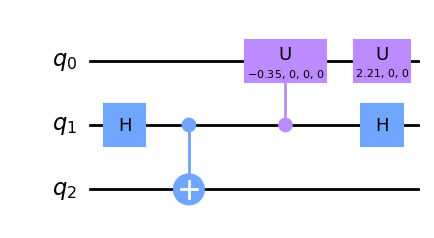

In [289]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
print("Initializing q_2 = |0>")
circ = QuantumCircuit(3)
circ.h(qubit=1)
circ.cx(control_qubit=1,
        target_qubit=2)
circ.cu(theta=2*theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0) # N.B. Remember to rotate by the double amount
circ.u(theta=2*theta_1, phi=0.0,lam=0.0,qubit=0) # N.B. Remember to rotate by the double amount
circ.h(qubit=1)
circ.draw('mpl')

In [290]:
type(circ)

qiskit.circuit.quantumcircuit.QuantumCircuit

In [291]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector_result = np.real_if_close(np.array(result.data()['statevector']))
print(statevector_result)

[ 0.2236068   0.4472136   0.2236068   0.4472136   0.2981424   0.40138649
 -0.2981424  -0.40138649]


Initializing q_2 = |1>


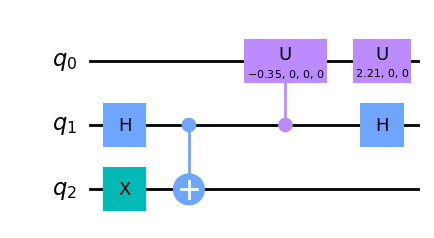

In [292]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
print("Initializing q_2 = |1>")
circ = QuantumCircuit(3)
circ.x(qubit=2)
circ.h(qubit=1)
circ.cx(control_qubit=1,
        target_qubit=2)
circ.cu(theta=2*theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0) # N.B. Remember to rotate by the double amount
circ.u(theta=2*theta_1, phi=0.0,lam=0.0,qubit=0) # N.B. Remember to rotate by the double amount
circ.h(qubit=1)
circ.draw('mpl')

In [293]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector_result = np.real_if_close(np.array(result.data()['statevector']))
print(statevector_result)

[ 0.2981424   0.40138649 -0.2981424  -0.40138649  0.2236068   0.4472136
  0.2236068   0.4472136 ]


### Simulating quantum device

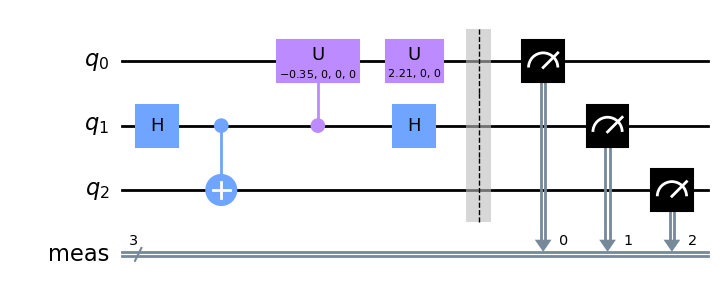

In [294]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
circ = QuantumCircuit(3)
#circ.x(qubit=2)
circ.h(qubit=1)
circ.cx(control_qubit=1,
        target_qubit=2)
circ.cu(theta=2*theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0) # N.B. Remember to rotate by the double amount
circ.u(theta=2*theta_1, phi=0.0,lam=0.0,qubit=0) # N.B. Remember to rotate by the double amount
circ.h(qubit=1)
circ.measure_all()
circ.draw('mpl')

[0.22097087 0.4363825  0.22316964 0.4408355  0.28811076 0.39528471
 0.29973947 0.4330127 ]


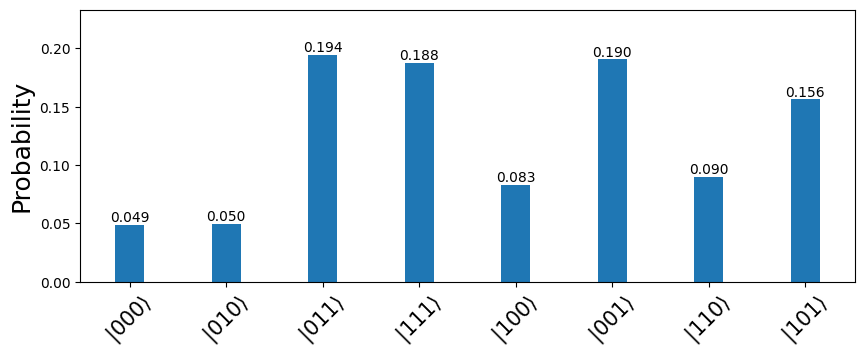

In [295]:
backend = Aer.get_backend('qasm_simulator')
backend.shots = 10000
result = execute(circ, backend).result()
counts = result.get_counts()
print(get_state_vector(counts=counts))
plot_count_histogram(counts=counts)

### Encoding normalized real vector

In [296]:
b_1, b_2 = 1,2
b = np.array([b_1, b_2])/np.sqrt(b_1**2+b_2**2)
print(b)

[0.4472136  0.89442719]


In [297]:
theta = 2*np.arccos(b[0])
phi = 0 # Choose phi depending on sign of second entry in b vector.
lmbda = 0
theta, phi

(2.214297435588181, 0)

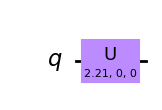

In [298]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
circ = QuantumCircuit(1)
circ.u(theta=theta, phi=phi,lam=lmbda,qubit=0)
circ.draw('mpl')

In [299]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector_result = np.real_if_close(np.array(result.data()['statevector']))
print(statevector_result)

[0.4472136  0.89442719]


In [300]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('unitary_simulator')
job = backend.run(circ)
result = job.result()
result.get_unitary()

Operator([[ 0.4472136 +0.j, -0.89442719+0.j],
          [ 0.89442719+0.j,  0.4472136 +0.j]],
         input_dims=(2,), output_dims=(2,))

# REMEMBER THAT QISKIT IS BACKWARDS!

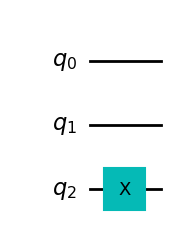

In [301]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
circ = QuantumCircuit(3)
circ.x(qubit=2)
circ.draw('mpl')

In [302]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector_result = np.real_if_close(np.array(result.data()['statevector']))
print(statevector_result.astype(int))

[0 0 0 0 1 0 0 0]


In [303]:
print("this is the 'normal' way: \n")
print(qubit_vector('000').flatten())
print(qubit_vector('100').flatten())

this is the 'normal' way: 

[1 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0]


# Trying to encode Fig. 9 of Berry article
(the qubit 'a' on the figure represents a register of possibly multiple qubits - here it is 2: q_1, q_2)

In [304]:
# See: https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html for instructions on user-defined operators

def get_Ua(A_mat: np.ndarray, q_2: int = 0) -> qiskit.quantum_info.operators.operator.Operator:
    """
    Constructs the unitary operator Ua that encodes a symmetric real 2x2 matrix 'A' as a quantum gate.

    Parameters
    ----------
    A_mat : np.ndarray
        The symmetric real 2x2 matrix to be encoded as a quantum gate.
    q_2 : int, optional
        The value of qubit 2, which should be either 0 or 1. Defaults to 0.

    Returns
    -------
    qiskit.quantum_info.operators.operator.Operator
        The operator Ua as a `qiskit.quantum_info.Operator` object.

    Raises
    ------
    ValueError
        If `q_2` is not equal to 0 or 1.
        If `A` is not a 2x2 symmetric real matrix.
    """


    if q_2 != 0 and q_2 != 1:
        raise ValueError("q_2 should have the value of either '0' or '1'. ")
    if A_mat.shape[0] != A_mat.shape[1] or A_mat.shape[0] != 2:
        raise ValueError("The given matrix 'A' should be 2x2.")
    if not check_symmetric(a=A_mat):
        raise ValueError("The given matrix 'A' should be symmetric.")
    if not np.all(np.isreal(A_mat)):
        raise ValueError("The given matrix 'A' should only contain real numbers.")

    # Normalizing w. respect to spectral norm
    _spectral_norm = np.sqrt(np.max(np.linalg.eigvals(A_mat.T@A_mat-np.eye(2))))
    _A_mat = 1/2*A/spectral_norm
    # Updating alpha_1, alpha_2 definition
    _alpha_1, _alpha_2 = 2*_A_mat[0,0], 2*_A_mat[0,1]
    # Defining rotation angles
    _theta_1 = np.arccos(_alpha_1)
    _theta_2 = np.arccos(_alpha_2) - _theta_1

    _NR_QUBITS = 3
    _circ = QuantumCircuit(_NR_QUBITS)
    if q_2 == 0:
        _circ.x(qubit=2)
    _circ.h(qubit=1)
    _circ.cx(control_qubit=1,target_qubit=2)
    _circ.cu(theta=2*_theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0) # N.B. Remember to rotate by the double amount
    _circ.u(theta=2*_theta_1, phi=0.0,lam=0.0,qubit=0) # N.B. Remember to rotate by the double amount
    _circ.h(qubit=1)
    _UA = Operator(_circ)
    _UA.name = f"$U_A$"
    return _UA

def get_Ub(b_vec: np.ndarray) -> qiskit.quantum_info.operators.operator.Operator:
    """
    Constructs the unitary operator Ub that encodes the 'b' vector as a quantum gate.

    Parameters
    ----------
    b_vec : numpy.ndarray
        A numpy array containing the 2 entries of the 'b' vector.

    Returns
    -------
    qiskit.quantum_info.operators.operator.Operator
        The operator Ub as a `qiskit.quantum_info.Operator` object.

    Raises
    ------
    ValueError
        If the length of the input vector 'b' is not 2.
        If the input vector 'b' does not contain only real values.

    """
    if len(b_vec) != 2:
        raise ValueError("The vector 'b' should only contain 2 entries.")
    if not np.all(np.isreal(b_vec)):
        raise ValueError("The vector 'b' should only contain real values.")
    # Normalizing 'b' vector
    b_vec *= 1.0/np.sqrt(b_vec[0]**2+b_vec[1]**2)
    # Calculating rotation-angles
    _theta = 2*np.arccos(b_vec[0])
    _phi = 0 # TODO: Choose phi depending on sign of second entry in b vector.
    _lmbda = 0
    # Creating circuit and transforming to operator
    _circ = QuantumCircuit(1)
    _circ.u(theta=_theta, phi=_phi,lam=_lmbda,qubit=0)
    return Operator(_circ)


def dagger(operator: qiskit.quantum_info.operators.operator.Operator) -> qiskit.quantum_info.operators.operator.Operator:
    """
    Constructs the Hermitian conjugate of a given operator, i.e., its transpose and complex conjugate.

    Parameters
    ----------
    operator : qiskit.quantum_info.operators.operator.Operator
        The operator to compute the Hermitian conjugate of.

    Returns
    -------
    qiskit.quantum_info.operators.operator.Operator
        The Hermitian conjugate of the input operator as a `qiskit.quantum_info.Operator` object.
    """
    return Operator(operator.data.conjugate().T)


def schedule_function(s:float, kappa: float = 0.9, p: float = 3/2) -> float:
    # TODO: Check what kappa should be, as 'kappa/(1-kappa)' is undf. for kappa=1.
    """
    Returns the value of the schedule function at a given point (kappa, p, s) as described
    in the article 'Optimal Scaling Quantum Linear-Systems Solver via Discrete' Adiabatic Theorem.

    Parameters
    ----------
    kappa : float
        The condition number of the matrix.

    p : float
        A number between 1 and 2.

    s : float
        A number between 0 and 1 representing the current point in the annealing schedule.

    Returns
    -------
    float
        The value of the schedule function evaluated at the given (kappa, p, s).
    """
    if kappa <= 0 or kappa > 1:
        raise ValueError("kappa must be a number between 0 and 1.")
    if not (1 < p < 2):
        raise ValueError("'p' must be a number between 1 and 2.")
    if not (0 <= s <= 1):
        raise ValueError("'s' must be a number between 0 and 1.")
    return kappa/(kappa-1.0)*(1.0-(1.0+s*(kappa**(p-1.0)-1.0))**(1.0/(1.0-p)))


def get_Rs(s: float) -> qiskit.quantum_info.operators.operator.Operator:
    """
    Constructs the reflection operator R(s).

    Parameters
    ----------
    s : float
        A number between 0 and 1 representing the current point in the annealing schedule.

    Returns
    -------
    qiskit.quantum_info.operators.operator.Operator
        The operator Rs as a `qiskit.quantum_info.Operator` object.

    Raises
    ------
    ValueError
        If 's' is not a number between 0 and 1.
    """
    if not (0 <= s <= 1):
        raise ValueError("'s' must be a number between 0 and 1.")
    _front_factor = 1.0 / np.sqrt((1.0 - schedule_function(s))**2 + schedule_function(s)**2)
    _matrix = np.array([[1.0 - schedule_function(s) , schedule_function(s)          ],
                        [schedule_function(s)       , -(1.0 - schedule_function(s)) ]])
    _matrix *= _front_factor
    return Operator(_matrix)


def get_projector(signature: str) -> qiskit.quantum_info.operators.operator.Operator:
    """
    This function returns a projection matrix based on the provided signature.

    Parameters:
    -----------
    signature : str
        The signature is defined as a string of two binary digits representing the projections of |0⟩ and |1⟩
        states respectively.

    Returns:
    --------
    np.ndarray
        A Qiskit Operator representing a projection matrix.

    Raises:
    -------
    ValueError
        If the provided signature is not one of the defined signatures.

    Examples:
    ---------
    >>> get_projektor('00')
    array([[1, 0],
           [0, 0]])

    >>> get_projektor('10')
    array([[0, 1],
           [0, 0]])
    """
    _zero, _one = np.array([[1],[0]]), np.array([[0],[1]])
    _signatures = {'00':_zero@_zero.T, '10':_one@_zero.T,
                   '01':_zero@_one.T , '11':_one@_one.T }
    if signature not in _signatures:
        raise ValueError(f"Given 'signature': {signature}, is undefined and should be one of: {_signatures}.")
    return Operator(_signatures[signature])


def tensor(operator_1: qiskit.quantum_info.operators.operator.Operator,
           operator_2: qiskit.quantum_info.operators.operator.Operator) -> qiskit.quantum_info.operators.operator.Operator:
    """
    This function takes two quantum operators and returns their tensor product.

    Parameters:
    -----------
    operator_1 : qiskit.quantum_info.operators.operator.Operator
        A quantum operator.

    operator_2 : qiskit.quantum_info.operators.operator.Operator
        A quantum operator.

    Returns:
    --------
    Operator
        The tensor product of the two provided operators.

    Raises:
    -------
    None

    Examples:
    ---------
    >>> from qiskit.quantum_info import Operator
    >>> import numpy as np
    >>> a = Operator(np.array([[1, 0], [0, 1]]))
    >>> b = Operator(np.array([[0, 1], [1, 0]]))
    >>> tensor(a, b)
    Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
              [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
              [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
              [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]], input_dims=((2, 2), (2, 2)), output_dims=((2, 2, 2, 2),))
    """
    return Operator(np.kron(operator_1.data, operator_2.data))


In [305]:
# Defining arbitrary symmetric A
alpha_1, alpha_2 = 3, 4
A = 1/2 * np.array([[alpha_1, alpha_2],[alpha_2, alpha_1]],dtype=float)
A

array([[1.5, 2. ],
       [2. , 1.5]])

In [306]:
# Defining arbitrary real b
b_1, b_2 = 1,2
b = np.array([b_1, b_2],dtype=float)
b.T

array([1., 2.])

In [307]:
# Defining operators needed in fig. 9 circuit
U_A = get_Ua(A_mat=A,q_2=0)
U_A_dagger = dagger(operator=U_A)
U_b = get_Ub(b_vec=b)
U_b_dagger = dagger(operator=U_b)
R_S = get_Rs(s=0)
one_one = get_projector(signature='11')
zero_zero = get_projector(signature='00')

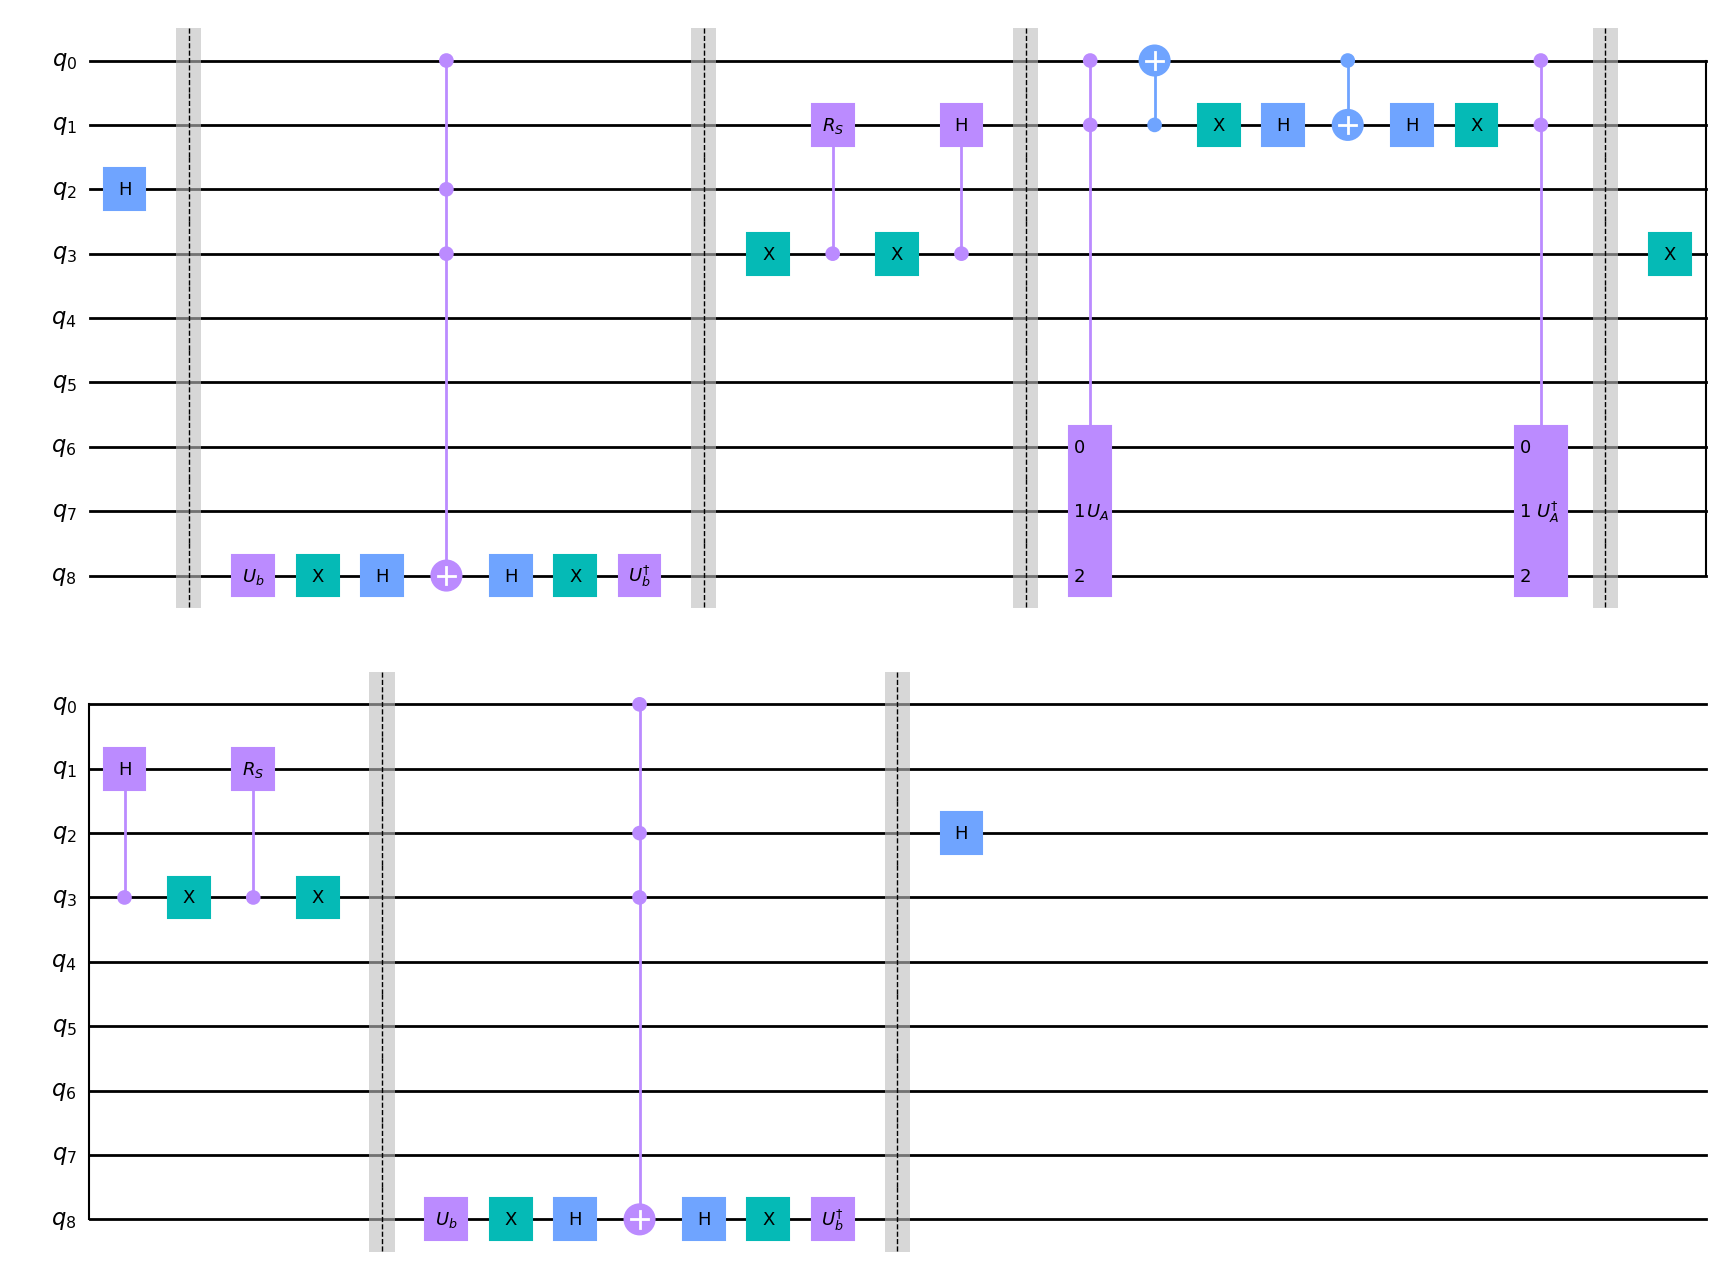

In [344]:
# Creating circuit
circ = QuantumCircuit(9)
circ.h(qubit=2)
circ.barrier()

circ.append(UnitaryGate(data=U_b.data,label=r'$U_b$'),qargs=[8])
circ.x(qubit=8) # For negative control (empty dot in circuit notation)

# Equivalent to multi-qubit controlled z gate.
circ.h(qubit=8)
circ.mct(control_qubits=[0,2,3],target_qubit=8) # Note that which is control and which is target doesn't matter for controlled-Z (symmetric matrix).
circ.h(qubit=8)

circ.x(qubit=8) # For negative control (empty dot in circuit notation)
circ.append(UnitaryGate(data=U_b_dagger.data,label=r'$U_b^{\dagger}$'),qargs=[8])
circ.barrier()

circ.x(qubit=3) # For negative control (empty dot in circuit notation)
R_s_qubit, control_qubit =1, 3
circ.append(UnitaryGate(data=R_S.data,label=f'$R_S$').control(num_ctrl_qubits=1),qargs=[control_qubit,R_s_qubit])
circ.x(qubit=3) # For negative control (empty dot in circuit notation)
circ.ch(control_qubit=3,target_qubit=1)
circ.barrier()

control_qubit_1, control_qubit_2 = 0,1
circ.append(UnitaryGate(data=U_A.data,label=r'$U_A$').control(num_ctrl_qubits=2),qargs=[control_qubit_1,control_qubit_2,6,7,8])
circ.cx(control_qubit=1,target_qubit=0)
circ.x(qubit=1) # For negative control (empty dot in circuit notation)
circ.h(qubit=1)
circ.cx(control_qubit=0,target_qubit=1)
circ.h(qubit=1)
circ.x(qubit=1)
circ.append(UnitaryGate(data=U_A_dagger.data,label=r'$U_A^{\dagger}$').control(num_ctrl_qubits=2),qargs=[control_qubit_1,control_qubit_2,6,7,8])
circ.barrier()

circ.x(qubit=3) # TODO: investigate whether the \sigma_x in the figure is to be understood as a bit-flip [[0,1],[1,0]]

circ.ch(control_qubit=3,target_qubit=1)
circ.x(qubit=3)# For negative control (empty dot in circuit notation)
R_s_qubit, control_qubit =1, 3
circ.append(UnitaryGate(data=R_S.data,label=f'$R_S$').control(num_ctrl_qubits=1),qargs=[control_qubit,R_s_qubit])
circ.x(qubit=3) # For negative control (empty dot in circuit notation)
circ.barrier()

circ.append(UnitaryGate(data=U_b.data,label=r'$U_b$'),qargs=[8])
circ.x(qubit=8) # For negative control (empty dot in circuit notation)
# Equivalent to multi-qubit controlled z gate.
circ.h(qubit=8)
circ.mct(control_qubits=[0,2,3],target_qubit=8) # Note that which is control and which is target doesn't matter for controlled-Z (symmetric matrix).
circ.h(qubit=8)
circ.x(qubit=8) # For negative control (empty dot in circuit notation)
circ.append(UnitaryGate(data=U_b_dagger.data,label=r'$U_b^{\dagger}$'),qargs=[8])
circ.barrier()

circ.h(qubit=2)

circ.draw('mpl')